<a href="https://colab.research.google.com/github/Anjasfedo/pytorch/blob/neural_network_classification/02_pytorch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with PyTorch

classification problem is predictiong wheater something is a thing or another

- Regression: prediction number
- Classification: prediction a thing
  - Binary Classification: one thing or other
  - Multiclass Classification: more than one thing or another
  - Multilabel Classification: multiple label option per sample

  classification oftenly have numerical input, and some probability output

  * Typical architecture of Neural Network
   - input layer shape (in_features): number of features
   - hidden layer
   - neuron per hidden layer: generly 10 to 512
   - output layer shape (out_features)
   - hidden layer activation: usually ReLu
   - output activation: Sigmoid (binary), Softmax (multiclass)
   - loss function: Binary crossentropy (binary), Cross entropy (multiclass)
   - Optimizer: SGD, Adam

## 1. Make classification data

In [1]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [2]:
print(f"First 5 sample of X: {X[:5]}")
print(f"First 5 sample of y: {y[:5]}")

First 5 sample of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y: [1 1 1 1 0]


In [3]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


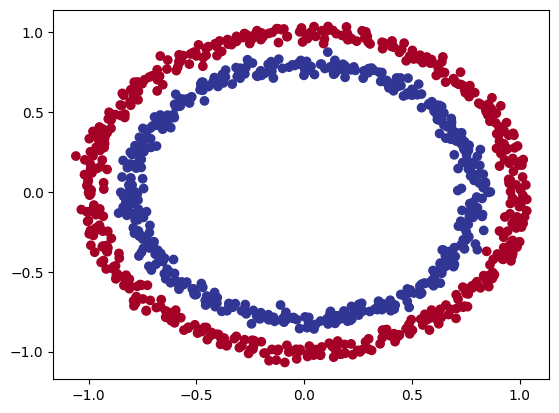

In [4]:
# Visualize, visaulize, visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: data we working with often reffered to as a toy dataset, a dataset that small enough to experiment, but still sizeable enough for practice the fundamentals

### 1.1 Check input & output shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train & test split

In [9]:
import torch
torch.__version__

'2.3.0+cu121'

In [10]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [13]:
# Split data into training & testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test, rest of 80% be train
                                                    random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

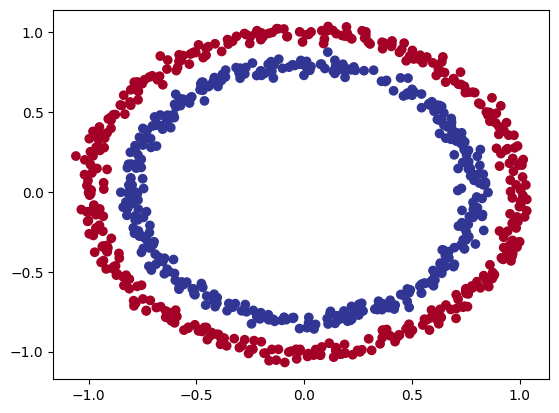

In [15]:
plt.scatter(x=X_train[:, 0],
            y=X_train[:, 1],
            c=y_train,
            cmap=plt.cm.RdYlBu)

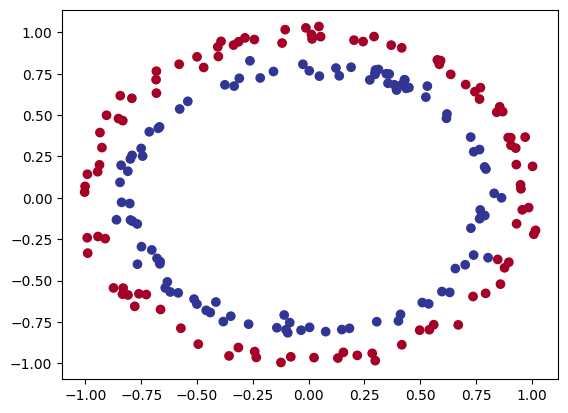

In [16]:
plt.scatter(x=X_test[:, 0],
            y=X_test[:, 1],
            c=y_test,
            cmap=plt.cm.RdYlBu)

## 2. Building a model

build a model to classify blue or red dots
to do:
1. setup device agnostic code for accelerator on GPU
2. construct a model (by subclassing `nn.Module`)
3. define loss function & optimizer
4. create training & testing loop

In [17]:
# Import PyTorch & nn
import torch
from torch import nn

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
# Move data sets to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

Now device agnostic have created, now lets create a mode that:
1. subclasses `nn.Module`
2. create 2 `nn.Linear()` layer that capable handling the shapes of data
3. define a `forward()` moethod that outlines the forward pass or forward computation
4. inisiate a instance of model class and send it to target device

In [19]:
X_train.shape

torch.Size([800, 2])

In [20]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [21]:
# 1. Construct a model that subclassed `nn.Module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 `nn.Linear()` layers that capable handling the shapes of input data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features, and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from prev layer and output 1 (y)

  # 3. Define a `forward()` method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# Instantiate an instance of model class, and send to device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
next(model_0.parameters()).device

device(type='cpu')

In [23]:
# Replicate the model with `nn.Sequential()`
model_01 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_01

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
class CircleModelV02(nn.Module):
  def __init__(self):
    super().__init__()

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
        )

  def forward(self, x):
    return self.two_linear_layers(x)

model_02 = CircleModelV02().to(device)
model_02

CircleModelV02(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [25]:
model_0.state_dict(), model_01.state_dict()

(OrderedDict([('layer_1.weight',
               tensor([[ 0.2747, -0.3310],
                       [ 0.1931, -0.2158],
                       [ 0.4242, -0.0840],
                       [ 0.0102,  0.7032],
                       [ 0.5970,  0.2471]])),
              ('layer_1.bias',
               tensor([-0.3471,  0.0673, -0.4803,  0.6917,  0.4439])),
              ('layer_2.weight',
               tensor([[-0.2183,  0.1419, -0.0388,  0.1748, -0.3489]])),
              ('layer_2.bias', tensor([0.1578]))]),
 OrderedDict([('0.weight',
               tensor([[ 0.0439,  0.4763],
                       [ 0.4737,  0.6608],
                       [ 0.4727,  0.1378],
                       [ 0.0195, -0.1539],
                       [-0.2858, -0.2168]])),
              ('0.bias',
               tensor([-0.3074, -0.6030,  0.6553, -0.7017,  0.0654])),
              ('1.weight',
               tensor([[ 0.2385, -0.2091,  0.3289,  0.3088, -0.0532]])),
              ('1.bias', tensor([0.2384]))]))

In [26]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_01(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function & optimizer

which loss function or optimizer should be use

this is problem specific

for example,
- for regressen might be use MAE or MSE (mean absolute error or mean squared error).
- for classification might be use binary cross entropy or categorical cross entropy (cross entropy).

as reminder, loss function measures how wrong the model is.

and for optimizer, two of the most common are useful are SGN and Adam.

In [27]:
# Setup loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitLoss = have build-in sigmoid activation

optimizer = torch.optim.SGD(params=model_01.parameters(),
                            lr=0.1)

In [28]:
# Calculate accuracy - out of 100 example, what percentage does the model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3, Train model

to train mode, we need to build a training loop
1. forward pass
2. calculate loss
3. optimizer zero grad
4. loss backward (backpropogation)
5. optimizer step (gradient descent)

### 3.1 Going from raw logits -> predictions probabilites -> prediction label

model outputs are going to be raw **logits**

we can convert this **logits** into prediction probabilies by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

then we can convert the model prediction probabilites to **prediction lavel** by either rounding them or taking the argmax()

In [29]:
# View 5 first outputs of the forward pass on the test data
model_01.eval()
with torch.inference_mode():
  y_logits = model_01(X_test)[:5]
y_logits

tensor([[0.2431],
        [0.2733],
        [0.2294],
        [0.2467],
        [0.3334]])

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [31]:
# Use the sigmoid activation function on the model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5605],
        [0.5679],
        [0.5571],
        [0.5614],
        [0.5826]])

For the prediction probability values, we need to perform a range style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [32]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_01(X_test))[:5])

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building the testing & training loops

In [34]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Build training & evaluation loop
for epoch in range(epochs):
  # Training
  model_01.train()

  # 1. Forward pass
  y_logit = model_01(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logit)) # turn logit -> pred probs -> pred label

  # Calculate the loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logit), # nn.BCEloss expect prediction probabilites as input
  #                y_train)
  loss = loss_fn(y_logit, # nn.BCEWithLogitsLoss expect raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropogation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_01.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logit = model_01(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logit))

    # 2. Calculate test loss
    test_loss = loss_fn(test_logit,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 10 == 0:
    # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f} | Train acc: {acc:.2f}% | Test acc: {test_acc:.2f}%")

Epoch: 0 | Train loss: 0.704 | Test loss: 0.703 | Train acc: 50.00% | Test acc: 50.00%
Epoch: 10 | Train loss: 0.696 | Test loss: 0.697 | Train acc: 50.00% | Test acc: 50.00%
Epoch: 20 | Train loss: 0.694 | Test loss: 0.695 | Train acc: 59.00% | Test acc: 54.50%
Epoch: 30 | Train loss: 0.693 | Test loss: 0.695 | Train acc: 52.38% | Test acc: 49.50%
Epoch: 40 | Train loss: 0.693 | Test loss: 0.695 | Train acc: 51.50% | Test acc: 47.00%
Epoch: 50 | Train loss: 0.693 | Test loss: 0.695 | Train acc: 51.50% | Test acc: 47.50%
Epoch: 60 | Train loss: 0.693 | Test loss: 0.695 | Train acc: 50.50% | Test acc: 48.00%
Epoch: 70 | Train loss: 0.693 | Test loss: 0.695 | Train acc: 50.12% | Test acc: 48.00%
Epoch: 80 | Train loss: 0.693 | Test loss: 0.695 | Train acc: 50.62% | Test acc: 47.50%
Epoch: 90 | Train loss: 0.693 | Test loss: 0.695 | Train acc: 50.50% | Test acc: 48.50%


## 4. Make predictions and evaluate the model

from the metric, look like the model isnt learning anything

to inspect it, lets make predictions and make them visual

to do so, we're going to import a function called `plot_decision_boundary()`

In [35]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

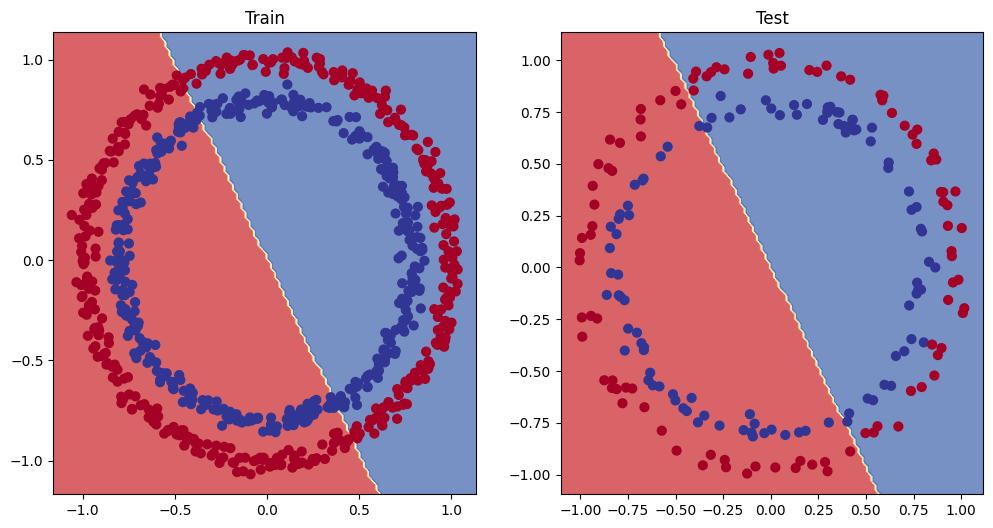

In [36]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_01, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_01, X_test, y_test)

## 5. Improving a model (from model prespective)

- add more layer - give model more chances to learn about patterns in the daya
- add more hidden units - go from 5 hidden units to 10 hidden units (neuron)
- fit for longer
- changing the activation functions
- change the learning rate
- change the loss function

these options are all from model prespective because they deal with directly with model, rather than data.

because these options are (ML enginner & DS) value can change, it aso reffered as **hyperparameters**

lets improve the model by:
- Adding more hidden units: 5 - 10
- incraise number of layers: 2 - 3
- incraise number of epochs: 100 - 1000

In [37]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [39]:
# Training and evaluate loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  # Training
  model_1.train()

  # 1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculater loss
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print what heppen
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:2f}%")

Epoch: 0 | Loss: 0.69396 | Acc 50.88% | Test loss: 0.69261 | Test acc: 51.000000%
Epoch: 100 | Loss: 0.69305 | Acc 50.38% | Test loss: 0.69379 | Test acc: 48.000000%
Epoch: 200 | Loss: 0.69299 | Acc 51.12% | Test loss: 0.69437 | Test acc: 46.000000%
Epoch: 300 | Loss: 0.69298 | Acc 51.62% | Test loss: 0.69458 | Test acc: 45.000000%
Epoch: 400 | Loss: 0.69298 | Acc 51.12% | Test loss: 0.69465 | Test acc: 46.000000%
Epoch: 500 | Loss: 0.69298 | Acc 51.00% | Test loss: 0.69467 | Test acc: 46.000000%
Epoch: 600 | Loss: 0.69298 | Acc 51.00% | Test loss: 0.69468 | Test acc: 46.000000%
Epoch: 700 | Loss: 0.69298 | Acc 51.00% | Test loss: 0.69468 | Test acc: 46.000000%
Epoch: 800 | Loss: 0.69298 | Acc 51.00% | Test loss: 0.69468 | Test acc: 46.000000%
Epoch: 900 | Loss: 0.69298 | Acc 51.00% | Test loss: 0.69468 | Test acc: 46.000000%


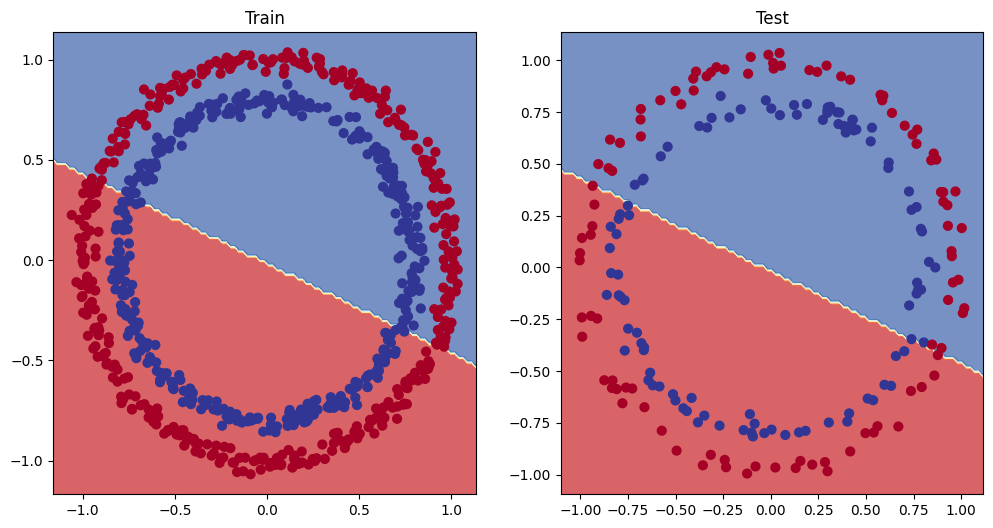

In [40]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if model can fit a stright line

One way to troubleshoot to a larger problem, is test it on smaller problem

In [41]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [42]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

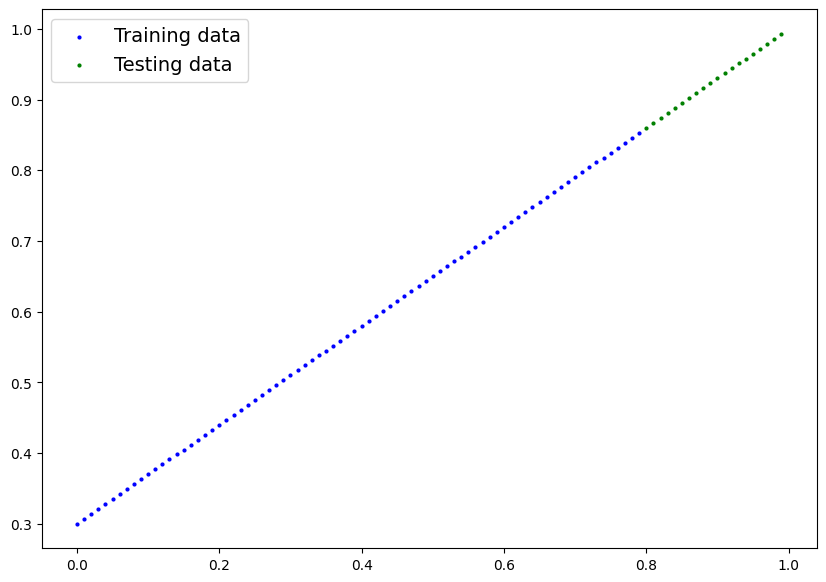

In [43]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [44]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [45]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [46]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
# Loss & Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [48]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what going on
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


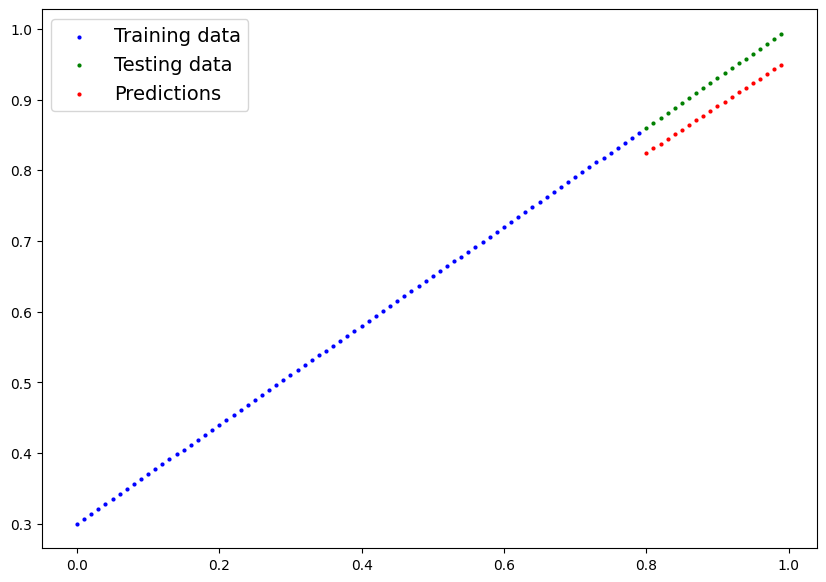

In [49]:
# Turn on evaluation mode
model_2.eval()

# Make prediction
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

## 6. Missing piece: non-linearity

"What patterns could be draw if there is an infinite amount of straight and non-straight lines?"

or in machine learning terms, an infinite (but really it is finite) of linear and non linear function

### 6.1 Recreating non-linear data (red and blue circle)

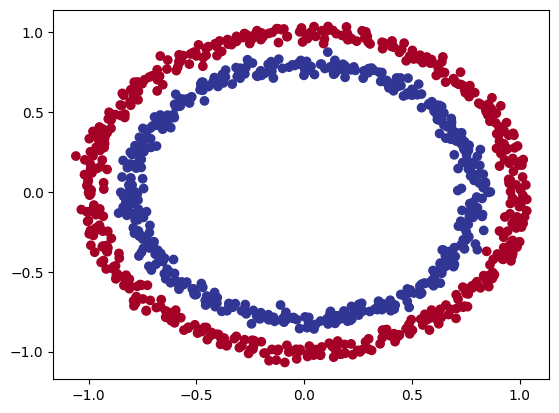

In [50]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [51]:
# Convert data to tensor and split to train and test
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train[:5], y_train[:5])
print(len(X_train), len(X_test), len(y_train), len(y_test))

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]]) tensor([1., 0., 0., 0., 1.])
800 200 800 200


### 6.2 buliding a model with non-linearity
- Liner = straight lines
- Non-linear = non-straight lines


Artificial neural network are a large combination of linear (straight) and non linear (non straight) fucntion that potentionaly able to find patterns on data


In [52]:
# Build model with non-linear activation function
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # ReLu is a non-linear activation function

  def forward(self, x):
    # Where should the non-linear activation functions
    z = self.layer_1(x)
    z = self.relu(z) # Place it between two layer
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    return z

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [53]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

### 6.3 Training model with non-linearity

In [54]:
# Training and evaluate loop
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculater loss
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print what happen
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:2f}%")

Epoch: 0 | Loss: 0.69295 | Acc 50.00% | Test loss: 0.69319 | Test acc: 50.000000%
Epoch: 100 | Loss: 0.69115 | Acc 52.88% | Test loss: 0.69102 | Test acc: 52.500000%
Epoch: 200 | Loss: 0.68977 | Acc 53.37% | Test loss: 0.68940 | Test acc: 55.000000%
Epoch: 300 | Loss: 0.68795 | Acc 53.00% | Test loss: 0.68723 | Test acc: 56.000000%
Epoch: 400 | Loss: 0.68517 | Acc 52.75% | Test loss: 0.68411 | Test acc: 56.500000%
Epoch: 500 | Loss: 0.68102 | Acc 52.75% | Test loss: 0.67941 | Test acc: 56.500000%
Epoch: 600 | Loss: 0.67515 | Acc 54.50% | Test loss: 0.67285 | Test acc: 56.000000%
Epoch: 700 | Loss: 0.66659 | Acc 58.38% | Test loss: 0.66322 | Test acc: 59.000000%
Epoch: 800 | Loss: 0.65160 | Acc 64.00% | Test loss: 0.64757 | Test acc: 67.500000%
Epoch: 900 | Loss: 0.62362 | Acc 74.00% | Test loss: 0.62145 | Test acc: 79.000000%


### 6.4 Evaluating a model trained with non-linear activation functions

In [55]:
# Make prediction
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

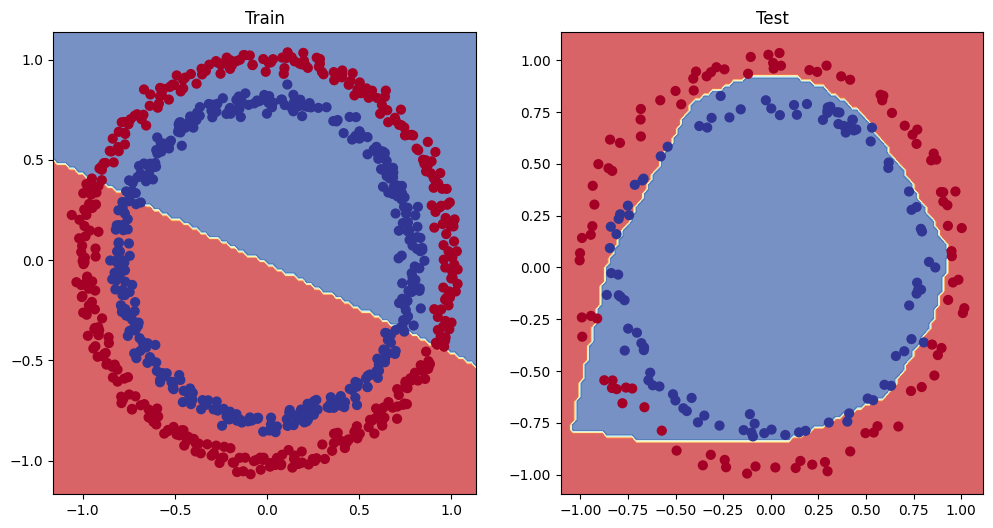

In [56]:
# Plot decitions boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 7. Replicating non-linear activation functions

Neural network, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the pattetn on it own

and these tools are linear & non-linear functions

In [57]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

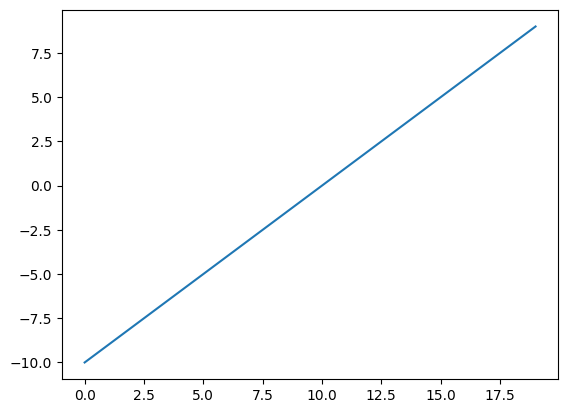

In [58]:
# Visualize the tensor
plt.plot(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


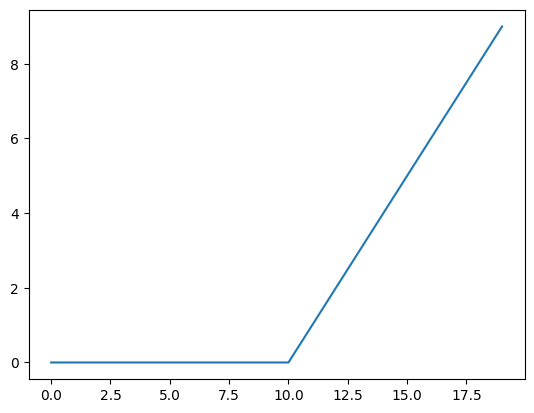

In [59]:
print(torch.relu(A))
plt.plot(torch.relu(A))

In [60]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0),
                   x) # Inputs must be tensors

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


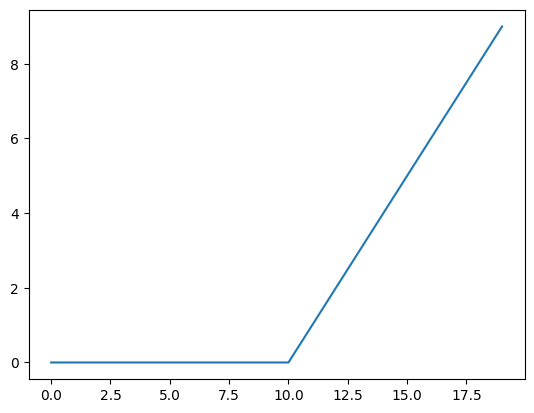

In [61]:
print(relu(A))
plt.plot(relu(A))

In [62]:
# Do same with sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])


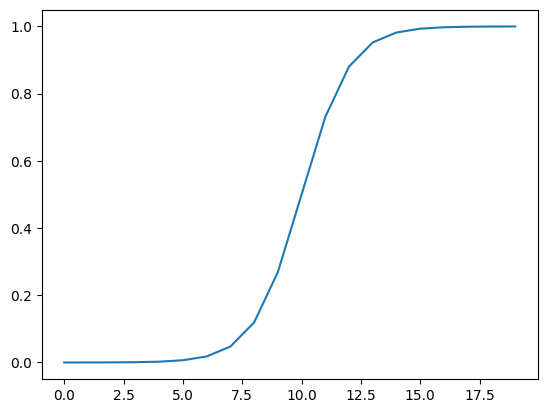

In [63]:
print(torch.sigmoid(A))
plt.plot(torch.sigmoid(A))

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])


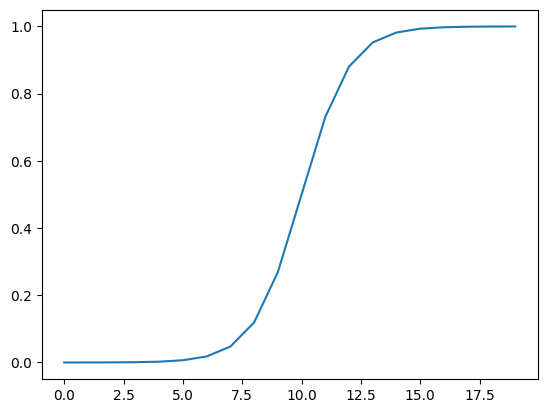

In [64]:
print(sigmoid(A))
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another
* Multi-class classification = more than two thing

### 8.1 Creating a toy multi-class dataset

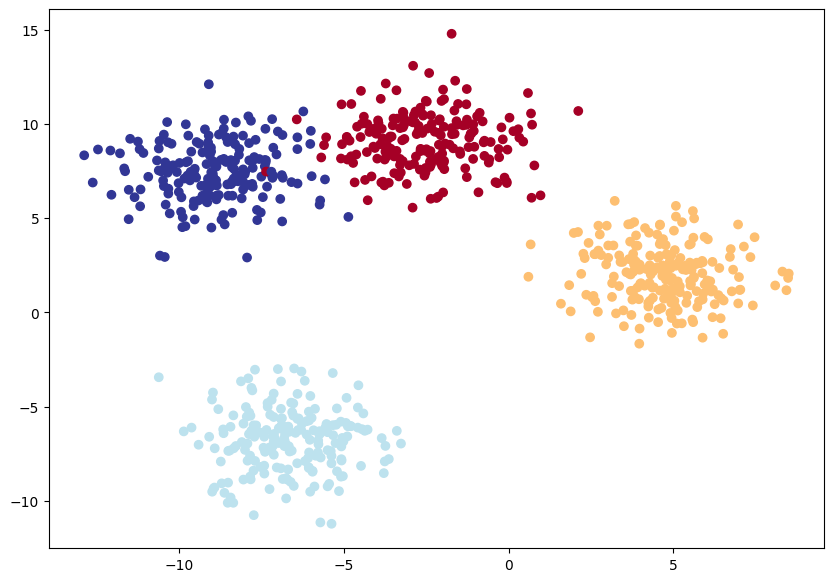

In [108]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5, # Give the clusters a little shake up
                           random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train dan test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                      y_blob,
                                                      test_size=0.2,
                                                      random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob_train[:, 0], X_blob_train[:, 1], c=y_blob_train, cmap=plt.cm.RdYlBu)

### 8.2 Buliding a multi-class classifcation model

In [109]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [110]:
# Build multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(in_features=input_features,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )

  def forward(self, x):
    return self.linear_stack(x)

# Create an instance of blob model and send it to target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [111]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [112]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and optimizer for multi-class classification model

In [113]:
# Create a loss function for mutli-class classification - measures how wrong the model are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer - update model parameter to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting Prediction probabilities of multi-class model

In order to evalutate and train and test mode, we need convert the model ouputs (logits) to prediction probabilites then to prediction labels

logits (raw output of model) > prediction probabilites (use `torch.softmax`) > prediction labels (take the argmax of the prediction probabilities)

In [114]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-2.7705,  2.6775,  0.8996,  1.6390],
        [-2.3418,  1.4599,  1.8450, -2.9282],
        [ 0.1118, -0.0062,  0.2767, -0.2512],
        [-1.5256,  1.5206,  0.9340,  0.9951],
        [-4.0562,  3.3472,  1.7606, -1.1502],
        [-2.6782,  1.6181,  2.1129, -3.4590],
        [ 0.1577,  0.0696,  0.5575, -0.6239],
        [-3.3482,  2.5153,  1.7833, -1.8695],
        [ 0.0608,  0.0410,  0.3525, -0.2909],
        [-3.5628,  2.7230,  1.7246, -1.6406]])

In [115]:
# Convert model logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:10])
print(y_pred_probs[:10])

tensor([[-2.7705,  2.6775,  0.8996,  1.6390],
        [-2.3418,  1.4599,  1.8450, -2.9282],
        [ 0.1118, -0.0062,  0.2767, -0.2512],
        [-1.5256,  1.5206,  0.9340,  0.9951],
        [-4.0562,  3.3472,  1.7606, -1.1502],
        [-2.6782,  1.6181,  2.1129, -3.4590],
        [ 0.1577,  0.0696,  0.5575, -0.6239],
        [-3.3482,  2.5153,  1.7833, -1.8695],
        [ 0.0608,  0.0410,  0.3525, -0.2909],
        [-3.5628,  2.7230,  1.7246, -1.6406]])
tensor([[2.8187e-03, 6.5476e-01, 1.1065e-01, 2.3177e-01],
        [8.9169e-03, 3.9928e-01, 5.8684e-01, 4.9606e-03],
        [2.6571e-01, 2.3614e-01, 3.1333e-01, 1.8482e-01],
        [2.1658e-02, 4.5559e-01, 2.5338e-01, 2.6937e-01],
        [5.0080e-04, 8.2211e-01, 1.6823e-01, 9.1570e-03],
        [5.1198e-03, 3.7593e-01, 6.1660e-01, 2.3450e-03],
        [2.5873e-01, 2.3691e-01, 3.8593e-01, 1.1842e-01],
        [1.8989e-03, 6.6833e-01, 3.2144e-01, 8.3310e-03],
        [2.4860e-01, 2.4373e-01, 3.3278e-01, 1.7489e-01],
        [1.3467e-

In [116]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [117]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [118]:
# Connvert model prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)

print(y_blob_test[:10])
print(y_preds[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
tensor([1, 2, 2, 1, 1, 2, 2, 1, 2, 1])


### 8.5 Create training loop and testing loop for multi-class model

In [119]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Set number of epochs
epochs = 100

# Loop through data
for epoch in range(epochs):
  # Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # Print what heppen
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test Acc {test_acc:.2f}%")

Epoch: 0 | Loss: 3.41496 | Acc: 50.50% | Test loss: 1.40713 | Test Acc 47.00%
Epoch: 10 | Loss: 0.36479 | Acc: 98.75% | Test loss: 0.33706 | Test Acc 99.50%
Epoch: 20 | Loss: 0.13816 | Acc: 98.88% | Test loss: 0.12807 | Test Acc 100.00%
Epoch: 30 | Loss: 0.08541 | Acc: 99.12% | Test loss: 0.07789 | Test Acc 99.50%
Epoch: 40 | Loss: 0.06452 | Acc: 99.25% | Test loss: 0.05744 | Test Acc 99.50%
Epoch: 50 | Loss: 0.05415 | Acc: 99.25% | Test loss: 0.04709 | Test Acc 99.50%
Epoch: 60 | Loss: 0.04804 | Acc: 99.25% | Test loss: 0.04082 | Test Acc 99.50%
Epoch: 70 | Loss: 0.04397 | Acc: 99.12% | Test loss: 0.03659 | Test Acc 99.50%
Epoch: 80 | Loss: 0.04106 | Acc: 99.12% | Test loss: 0.03352 | Test Acc 99.50%
Epoch: 90 | Loss: 0.03888 | Acc: 99.12% | Test loss: 0.03117 | Test Acc 99.50%


### 8.6 Making and evalutaing predictions with a pytorch multi-class classification model

In [121]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[ 1.5566e+00,  7.1937e+00, -2.6344e+00, -2.5129e+00],
        [-1.5991e-02, -5.3332e+00, -2.1672e+00,  4.4990e+00],
        [-5.1043e+00, -1.4285e+00,  7.0486e+00,  1.2762e+00],
        [-1.6334e-01,  5.2482e+00, -6.2883e-01, -2.0704e+00],
        [ 6.6359e+00,  1.7918e+00, -6.4002e+00, -1.0324e+00],
        [-2.8023e-01, -6.3153e+00, -2.3125e+00,  5.4340e+00],
        [-4.2046e+00, -8.9074e-01,  6.3032e+00,  3.3535e-01],
        [ 5.7651e+00, -3.2781e-01, -5.9797e+00,  5.1769e-03],
        [-6.6958e+00, -2.2407e+00,  8.5583e+00,  2.6286e+00],
        [ 6.1185e+00,  2.4615e-01, -5.9340e+00, -4.2730e-01]])

In [122]:
# Go from logits > prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

y_pred_probs[:10]

tensor([[3.5502e-03, 9.9634e-01, 5.3717e-05, 6.0654e-05],
        [1.0811e-02, 5.3047e-05, 1.2578e-03, 9.8788e-01],
        [5.2556e-06, 2.0749e-04, 9.9669e-01, 3.1019e-03],
        [4.4296e-03, 9.9213e-01, 2.7810e-03, 6.5785e-04],
        [9.9172e-01, 7.8100e-03, 2.1622e-06, 4.6353e-04],
        [3.2865e-03, 7.8659e-06, 4.3067e-04, 9.9627e-01],
        [2.7232e-05, 7.4865e-04, 9.9667e-01, 2.5513e-03],
        [9.9461e-01, 2.2466e-03, 7.8875e-06, 3.1343e-03],
        [2.3664e-07, 2.0367e-05, 9.9733e-01, 2.6523e-03],
        [9.9576e-01, 2.8044e-03, 5.8056e-06, 1.4301e-03]])

In [124]:
# Go from prediciton probabilites > prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)

y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [123]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

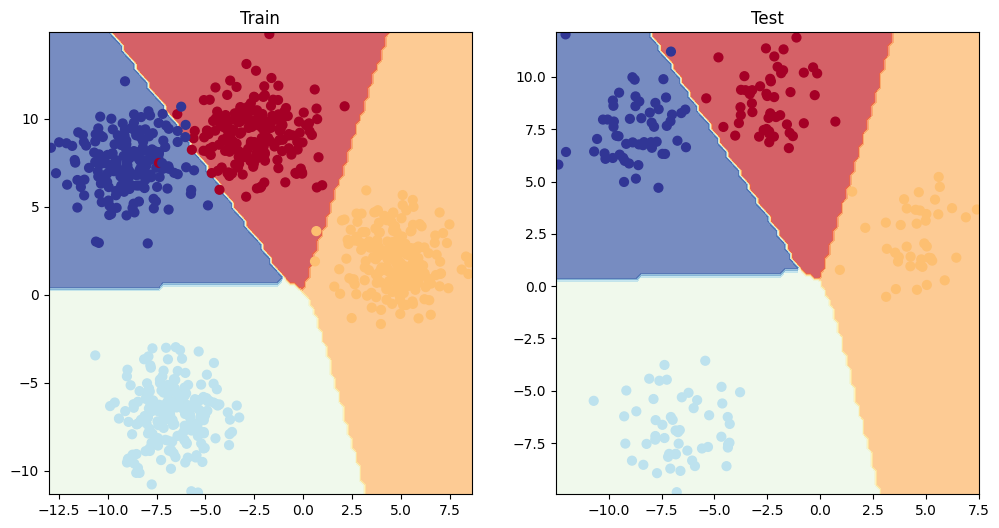

In [120]:
# Plot decitions boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate classification mode)

* Accuracy - out of 100 samples, how many does model get right?
* Precision
* Recail
* F1-score
* Confusion matrix
* Classification report

In [125]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [126]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_blob_test, y_preds)

tensor(0.9950)